In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('E:/Thesis/Chest X-Ray Database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (1).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (10).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (100).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (101).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (102).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (103).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (104).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (105).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (106).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (107).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (108).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (109).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (11).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (110).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\CXRN_Test (111).jpeg
E:/Thesis/Chest X-Ray Database\Test\Normal\C

E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (179).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (18).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (180).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (181).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (182).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (183).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (184).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (185).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (186).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (187).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (188).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (189).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (19).jpeg
E:/Thesis/Chest X-Ray Database\Train\Pneumonia\CXRP_Virus (190).jpeg
E:/Thesis/Chest X-Ray Database\Train

In [2]:
import cv2 as cv
from keras_preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt       
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import tensorflow as tf

In [3]:
labels = ['Pneumonia', 'Normal']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
# Define our example directories and files
base_dir = 'E:/Thesis/Chest X-Ray Database'

train_dir = os.path.join( base_dir, 'Train')
validation_dir = os.path.join( base_dir, 'Validate')
test_dir = os.path.join( base_dir,'Test')

In [5]:
train = get_training_data(train_dir)
test = get_training_data(test_dir)
val = get_training_data(validation_dir)

C:\Users\User\AppData\Local\Temp\ipykernel_10848\2908562546.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Text(0.5, 1.0, 'Normal')

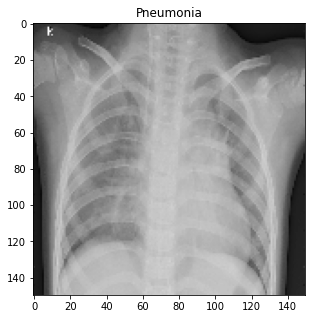

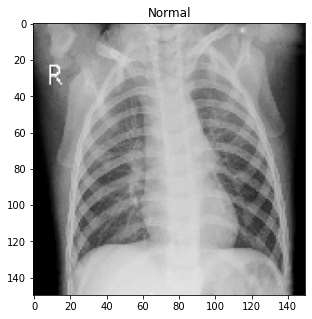

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [7]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [8]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 25,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [12]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
66/66 [==============================] - 98s 1s/step - loss: 0.9697 - accuracy: 0.8024 - val_loss: 10.1181 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/12
66/66 [==============================] - 94s 1s/step - loss: 0.4240 - accuracy: 0.8276 - val_loss: 15.4346 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/12
66/66 [==============================] - ETA: 0s - loss: 0.3410 - accuracy: 0.8548
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
66/66 [==============================] - 95s 1s/step - loss: 0.3410 - accuracy: 0.8548 - val_loss: 14.9157 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/12
66/66 [==============================] - 96s 1s/step - loss: 0.2572 - accuracy: 0.8981 - val_loss: 16.8172 - val_accuracy: 0.6250 - lr: 3.0000e-04
Epoch 5/12
66/66 [==============================] - ETA: 0s - loss: 0.2242 - accuracy: 0.9171
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
66/66 [==============================] - 95s 1s/ste

In [15]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]) 
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

16/16 [==============================] - 4s 242ms/step - loss: 0.4983 - accuracy: 0.8580
Loss of the model is -  0.4983135163784027
16/16 [==============================] - 4s 241ms/step - loss: 0.4983 - accuracy: 0.8580
Accuracy of the model is -  85.79999804496765 %


In [16]:
final_model.save('our_model.h5')

NameError: name 'final_model' is not defined

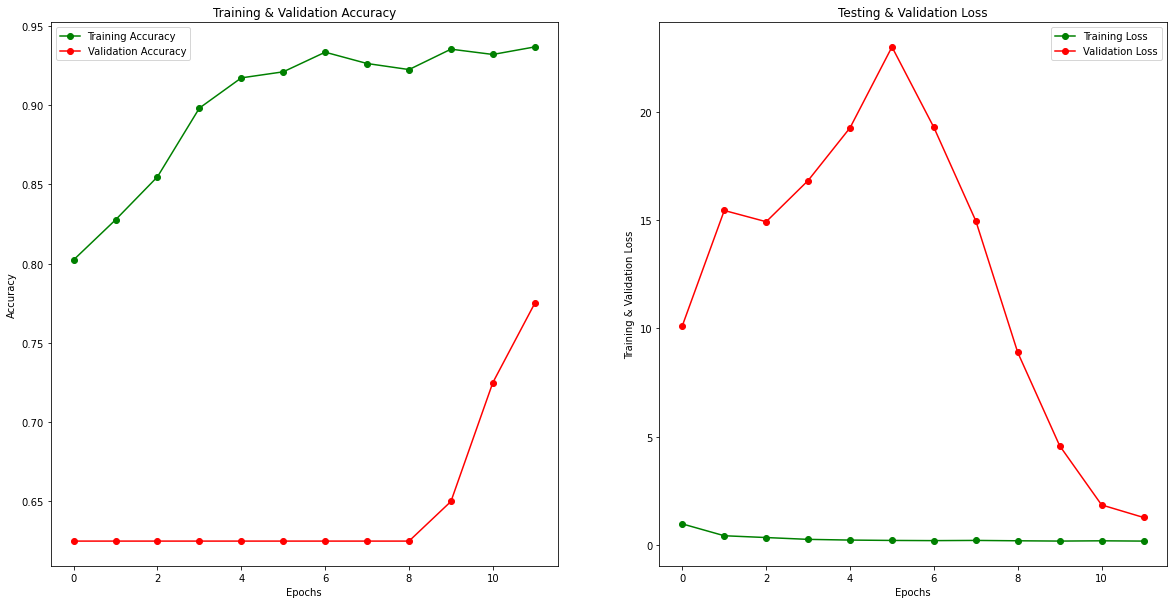

In [17]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [18]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]

16/16 [==============================] - 4s 246ms/step


In [19]:


print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))



                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.82      0.98      0.89       300
   Normal (Class 1)       0.96      0.68      0.79       200

           accuracy                           0.86       500
          macro avg       0.89      0.83      0.84       500
       weighted avg       0.87      0.86      0.85       500



In [20]:
cm = confusion_matrix(y_test,predictions)
cm

array([[294,   6],
       [ 65, 135]], dtype=int64)

In [21]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

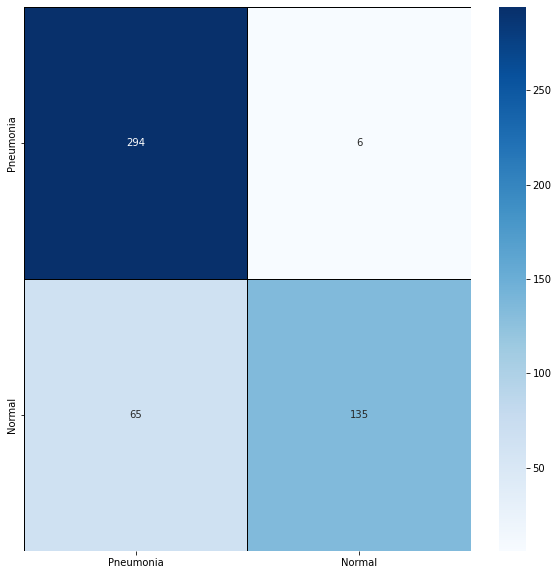

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [23]:


correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]




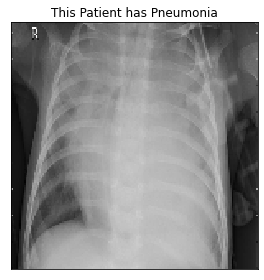

In [28]:
i = 0
for c in correct[:1]:
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("This Patient has Pneumonia".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [11]:
train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test))
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()

In [12]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [13]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

In [17]:
#Alex net cnn architecture

model1=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])
model1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 35, 35, 128)       15616     
                                                                 
 batch_normalization_5 (Batc  (None, 35, 35, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       819456    
                                                                 
 batch_normalization_6 (Batc  (None, 17, 17, 256)      1024      
 hNormalization)                                                 
                                                      

In [20]:
history1=model1.fit(
    datagen.flow(x_train,y_train),
    epochs=12,
    validation_data=datagen.flow(x_val, y_val),
    validation_freq=1
)

Epoch 1/12
66/66 [==============================] - 59s 864ms/step - loss: 1.1673 - accuracy: 0.6248 - val_loss: 2.1786 - val_accuracy: 0.6250
Epoch 2/12
66/66 [==============================] - 59s 900ms/step - loss: 0.7185 - accuracy: 0.7295 - val_loss: 1.9083 - val_accuracy: 0.6250
Epoch 3/12
66/66 [==============================] - 71s 1s/step - loss: 0.6058 - accuracy: 0.7619 - val_loss: 1.5938 - val_accuracy: 0.6250
Epoch 4/12
66/66 [==============================] - 64s 966ms/step - loss: 0.5421 - accuracy: 0.7962 - val_loss: 1.4295 - val_accuracy: 0.6250
Epoch 5/12
66/66 [==============================] - 54s 823ms/step - loss: 0.5109 - accuracy: 0.8043 - val_loss: 1.4875 - val_accuracy: 0.6250
Epoch 6/12
66/66 [==============================] - 54s 824ms/step - loss: 0.4929 - accuracy: 0.8095 - val_loss: 1.2774 - val_accuracy: 0.6250
Epoch 7/12
66/66 [==============================] - 54s 817ms/step - loss: 0.4435 - accuracy: 0.8329 - val_loss: 1.4243 - val_accuracy: 0.6250
Ep

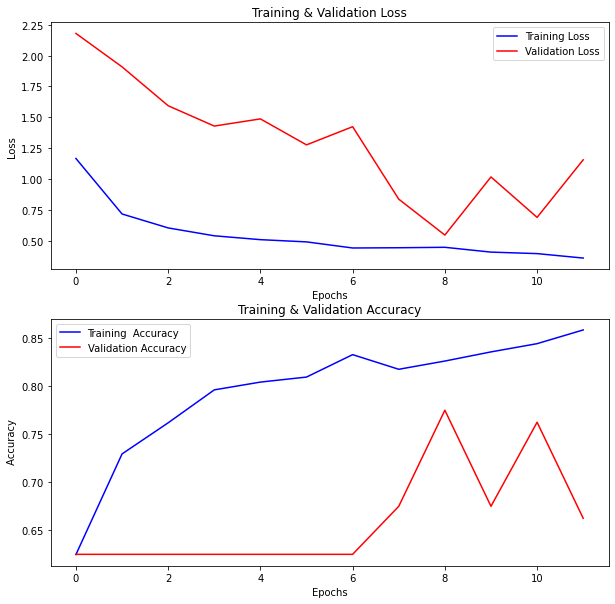

In [22]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model1.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model1.history.history['val_loss'],color='r',label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

#Plotting the training accuracy and validation accuracy
ax[1].plot(model1.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model1.history.history['val_accuracy'],color='r',label='Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel(" Accuracy")
ax[1].legend()

plt.show()

In [23]:
print('Accuracy Score = ',np.max(model1.history.history['val_accuracy']))

Accuracy Score =  0.7749999761581421


In [24]:
print("Loss of the model is - " , model1.evaluate(x_test,y_test)[0]) 

16/16 [==============================] - 3s 182ms/step - loss: 1.2841 - accuracy: 0.6120
Loss of the model is -  1.284112572669983
